In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def grid_dirichlet1D(a, b, Nx):
    return np.linspace(a, b, Nx)

In [8]:
def init1(x, d0):
    u = np.zeros_like(x, dtype=float)
    for i in range(u.shape[0]):
       if (x[i]<d0):
           u[i] = 1
    return u

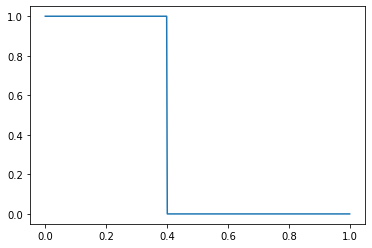

In [9]:
a, b = 0, 1
Nx = 500

dx = (b-a)/Nx
x = grid_dirichlet1D(a, b, Nx)
u0 = init1(x, 0.4)

plt.plot(x, u0)

In [13]:
def F(uL, uR, a):
    return a * (uL + uR / 2) + np.abs(a) * (uR - uL) / 2